### Case Study: Data Augmentation API of Pytorch

In [3]:
import torch
from PIL import Image
from torchvision import transforms
# from transforms import Compose, RandomRotation # error!

torch.__version__

'1.1.0'

In [6]:
dir(transforms).__str__()

"['CenterCrop', 'ColorJitter', 'Compose', 'FiveCrop', 'Grayscale', 'Lambda', 'LinearTransformation', 'Normalize', 'Pad', 'RandomAffine', 'RandomApply', 'RandomChoice', 'RandomCrop', 'RandomGrayscale', 'RandomHorizontalFlip', 'RandomOrder', 'RandomResizedCrop', 'RandomRotation', 'RandomSizedCrop', 'RandomVerticalFlip', 'Resize', 'Scale', 'TenCrop', 'ToPILImage', 'ToTensor', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'functional', 'transforms']"

#### A special case: rotation

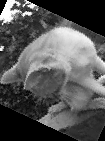

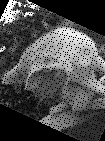

In [4]:
from torchvision.transforms import RandomRotation

import importlib
import custom_data_aug_api
importlib.reload(custom_data_aug_api)
from custom_data_aug_api import rotate

im = Image.open('test.jpg').convert('L')
T = RandomRotation((65, 65))
display(T(im))
display(rotate(im, 65, center=True))

In [62]:
print(RandomRotation.__doc__)

Rotate the image by angle.

    Args:
        degrees (sequence or float or int): Range of degrees to select from.
            If degrees is a number instead of sequence like (min, max), the range of degrees
            will be (-degrees, +degrees).
        resample ({PIL.Image.NEAREST, PIL.Image.BILINEAR, PIL.Image.BICUBIC}, optional):
            An optional resampling filter. See `filters`_ for more information.
            If omitted, or if the image has mode "1" or "P", it is set to PIL.Image.NEAREST.
        expand (bool, optional): Optional expansion flag.
            If true, expands the output to make it large enough to hold the entire rotated image.
            If false or omitted, make the output image the same size as the input image.
            Note that the expand flag assumes rotation around the center and no translation.
        center (2-tuple, optional): Optional center of rotation.
            Origin is the upper left corner.
            Default is the center of the

In [64]:
if __name__ == '__main__':
    import pdb; pdb.set_trace()
    T(im)

> <ipython-input-64-688a700ba61f>(3)<module>()
-> T(im)
(Pdb) s
--Call--
> /opt/conda/lib/python3.6/site-packages/torchvision/transforms/transforms.py(895)__call__()
-> def __call__(self, img):
(Pdb) s
> /opt/conda/lib/python3.6/site-packages/torchvision/transforms/transforms.py(903)__call__()
-> angle = self.get_params(self.degrees)
(Pdb) n
> /opt/conda/lib/python3.6/site-packages/torchvision/transforms/transforms.py(905)__call__()
-> return F.rotate(img, angle, self.resample, self.expand, self.center)
(Pdb) !angle
56.51439692146428
(Pdb) !(self.resample, self.expand, self.center)
(False, False, None)
(Pdb) s
--Call--
> /opt/conda/lib/python3.6/site-packages/torchvision/transforms/functional.py(637)rotate()
-> def rotate(img, angle, resample=False, expand=False, center=None):
(Pdb) l
632  	
633  	    img = img.convert(input_mode)
634  	    return img
635  	
636  	
637  ->	def rotate(img, angle, resample=False, expand=False, center=None):
638  	    """Rotate the image by angle.
639  	


(Pdb) !fillcolor
(Pdb) n
> /opt/conda/lib/python3.6/site-packages/PIL/Image.py(2216)transform()
-> im = new(self.mode, size, fillcolor)
(Pdb) n
> /opt/conda/lib/python3.6/site-packages/PIL/Image.py(2217)transform()
-> if method == MESH:
(Pdb) n
> /opt/conda/lib/python3.6/site-packages/PIL/Image.py(2223)transform()
-> im.__transformer((0, 0)+size, self, method, data,
(Pdb) s
> /opt/conda/lib/python3.6/site-packages/PIL/Image.py(2224)transform()
-> resample, fillcolor is None)
(Pdb) s
--Call--
> /opt/conda/lib/python3.6/site-packages/PIL/Image.py(2228)__transformer()
-> def __transformer(self, box, image, method, data,
(Pdb) !box
(0, 0, 105, 141)
(Pdb) !self
<PIL.Image.Image image mode=L size=105x141 at 0x7FE9F40AE8D0>
(Pdb) !image
<PIL.Image.Image image mode=L size=105x141 at 0x7FE9F409E860>
(Pdb) !print(image.load.__doc__)

        Allocates storage for the image and loads the pixel data.  In
        normal cases, you don't need to call this method, since the
        Image class automa

#### Top-Bottom Trace
http://192.168.7.177:12003/edit/opt/conda/lib/python3.6/site-packages/torchvision/transforms/transforms.py
+ \_\_call\_\_

http://192.168.7.177:12003/edit/opt/conda/lib/python3.6/site-packages/torchvision/transforms/functional.py 
+ rotate

http://192.168.7.177:12003/edit/opt/conda/lib/python3.6/site-packages/PIL/Image.py 
+ rotate
+ transform
+ \_\_transformer

https://github.com/python-pillow/Pillow/blob/90a94e7dae19f75363c769713b1b6d10eb16f613/src/_imaging.c#L3160 
+ [_transform2](https://github.com/python-pillow/Pillow/blob/90a94e7dae19f75363c769713b1b6d10eb16f613/src/_imaging.c#L1784)

https://github.com/python-pillow/Pillow/blob/90a94e7dae19f75363c769713b1b6d10eb16f613/src/libImaging/Geometry.c#L1004 
+ ImagingTransform
+ ImagingTransformAffine (#L908)
    + ImagingScaleAffine
    + affine_fixed
    + ImagingGenericTransform
        + filter

In [77]:
print(im.getpixel((0, 0)), end=' ')
print(im.getpixel((0, 1)), end=' ')
print(im.getpixel((1, 0)), end=' ')
print(im.getpixel((2, 0)))

print(im.im[0], end=' ')
print(im.im[1], end=' ')
print(im.im[2])

71 48 62 38
71 62 38


In [81]:
print(im.im.size)
print(im.im.mode)

(105, 141)
L


In [85]:
im.im.size

(105, 141)

In [6]:
dir(im.im).__str__()

"['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'bands', 'box_blur', 'chop_add', 'chop_add_modulo', 'chop_and', 'chop_darker', 'chop_difference', 'chop_invert', 'chop_lighter', 'chop_multiply', 'chop_or', 'chop_screen', 'chop_subtract', 'chop_subtract_modulo', 'chop_xor', 'color_lut_3d', 'convert', 'convert2', 'convert_matrix', 'convert_transparent', 'copy', 'crop', 'effect_spread', 'expand', 'fillband', 'filter', 'gaussian_blur', 'getband', 'getbbox', 'getcolors', 'getextrema', 'getpalette', 'getpalettemode', 'getpixel', 'getprojection', 'histogram', 'id', 'isblock', 'mode', 'modefilter', 'new_block', 'offset', 'paste', 'pixel_access', 'point', 'point_transform', 'ptr', 'putband', 'putdata', 'putpalette', '